# Generate Polylla mesh

In [1]:
from pruebaTetra import FaceTetrahedronMesh, EdgeTetrahedronMesh, saveLog
from mesh import TetrahedronMesh
# from PolyllaEdge import PolyllaEdge
from PolyllaFace import PolyllaFace
import time
numVertices = 20

In [2]:
filename = "data/"+ str(numVertices) + "random.1"
outputname = "data/"+ str(numVertices) + "random"
node_file = filename + ".node"
ele_file = filename + ".ele"
face_file = filename + ".face"
edge_file = filename + ".edge"

# Random Polylla

In [3]:
filename = "data/"+ str(numVertices) + "random.1"
outputname = "data/"+ str(numVertices) + "random"
node_file = filename + ".node"
ele_file = filename + ".ele"
face_file = filename + ".face"
edge_file = filename + ".edge"

tf2 = time.time()
mesh = TetrahedronMesh(node_file, face_file, ele_file,edge_file)
polyllaFace_mesh_original = PolyllaFace(mesh)
tf3 = time.time()

t0 = time.time()
mesh_f = FaceTetrahedronMesh(node_file, face_file, ele_file)
polyllaFace_mesh_prueba = PolyllaFace(mesh_f)
tf1 = time.time()


# polyllaEdge_mesh = PolyllaEdge(mesh)


saveLog('tetra_prueba_log.txt',mesh_f.tetra_list)
saveLog('tetra_mesh_log.txt',mesh.tetra_list)


print('Tiempo Sergio`s version:',tf3-tf2,'segs')
print('Tiempo Magda`s version:',tf1-t0,'segs')

print('\n Stats polylla original')

# polyllaEdge_mesh.get_info()

polyllaFace_mesh_original.get_info()
print('\n Stats polylla Prueba:')
polyllaFace_mesh_prueba.get_info()

filename_face = "logs/face_orig"+str(numVertices)
filename_face_poly = "logs/face_orig"+str(numVertices)
polyllaFace_mesh_original.printOFF_each_poly(filename_face)
# polyllaFace_mesh_original.printOFF_polyhedralmesh(filename_face_poly)
filename_prueba = "logs/face_prueba"+str(numVertices)
polyllaFace_mesh_prueba.printOFF_each_poly(filename_prueba)

saveLog('logFaceOrg',mesh.face_list)
saveLog('logTetraOrg',mesh.tetra_list)
saveLog('logFacePrueba',mesh_f.face_list)
saveLog('logTetraPrueba',mesh_f.tetra_list)
saveLog('logEdgeOrg',mesh.edge_list)
saveLog('logEdgePrueba',mesh_f.edge_list)


reading node file: data/500random.1.node
reading face file: data/500random.1.face
reading ele file: data/500random.1.ele
reading edge file: data/500random.1.edge
Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
repair phase:
edge:  40 face:  59
repair phase:
edge:  26 face:  83
repair phase:
edge:  44 face:  47
edge:  86 face:  105
repair phase:
edge:  33 face:  9
edge:  12 face:  36
edge:  49 face:  100
Tiempo Sergio`s version: 0.011516332626342773 segs
Tiempo Magda`s version: 0.006469249725341797 segs

 Stats polylla original
PolyllaFace info:
Number of polyhedrons: 23
Number of barrier faces: 8
Number of polyhedra with barrier faces: 4
Number of polyhedrons that are tetrahedrons: 7

 Stats polylla Prueba:
PolyllaFace info:
Number of polyhedrons: 23
Number of barrier faces: 8
Number of polyhedra with barrier faces: 4
Number of polyhedrons that are tetrahedrons: 8
writing OFF files: logs/face_orig20
writing OFF files: logs/

In [4]:
t0 = time.time()
mesh_f = EdgeTetrahedronMesh(node_file, face_file, ele_file)
polyllaEdge_mesh_prueba = PolyllaEdge(mesh_f)
tf1 = time.time()

tf2 = time.time()
mesh = TetrahedronMesh(node_file, face_file, ele_file,edge_file)
polyllaEdge_mesh_original = PolyllaEdge(mesh)
tf3 = time.time()




# polyllaEdge_mesh = PolyllaEdge(mesh)

print('Tiempo Sergio`s version:',tf3-tf2,'segs')
print('Tiempo Magda`s version:',tf1-t0,'segs')

print('\n Stats polylla original')

# polyllaEdge_mesh.get_info()

polyllaEdge_mesh_original.get_info()
print('\n Stats polylla Prueba:')
polyllaEdge_mesh_prueba.get_info()

filename_face = "edge_orig"+str(numVertices)+".off"
polyllaEdge_mesh_original.printOFF_faces(filename_face, polyllaEdge_mesh_original.mesh.face_list)
filename_prueba = "edge_prueba"+str(numVertices)+".off"
polyllaEdge_mesh_prueba.printOFF_faces(filename_prueba, polyllaEdge_mesh_prueba.mesh.face_list)

saveLog('logFaceOrg',mesh.face_list)
saveLog('logTetraOrg',mesh.tetra_list)
saveLog('logFacePrueba',mesh_f.face_list)
saveLog('logTetraPrueba',mesh_f.tetra_list)
saveLog('logEdgeOrg',mesh.edge_list)
saveLog('logEdgePrueba',mesh_f.edge_list)

Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
reading node file: data/20random.1.node
reading face file: data/20random.1.face
reading ele file: data/20random.1.ele
reading edge file: data/20random.1.edge
Tiempo Sergio`s version: 0.006776571273803711 segs
Tiempo Magda`s version: 0.006812095642089844 segs

 Stats polylla original
PolyllaEdge info:
Number of polyhedrons: 38
Number of barrier-edges: 0
Number of hanging polyhedrons: 44.0
Number of polyhedrons that are tetrahedrons: 26

 Stats polylla Prueba:
PolyllaEdge info:
Number of polyhedrons: 122
Number of barrier-edges: 41
Number of hanging polyhedrons: 99.0
Number of polyhedrons that are tetrahedrons: 79


## Plot Polylla mesh

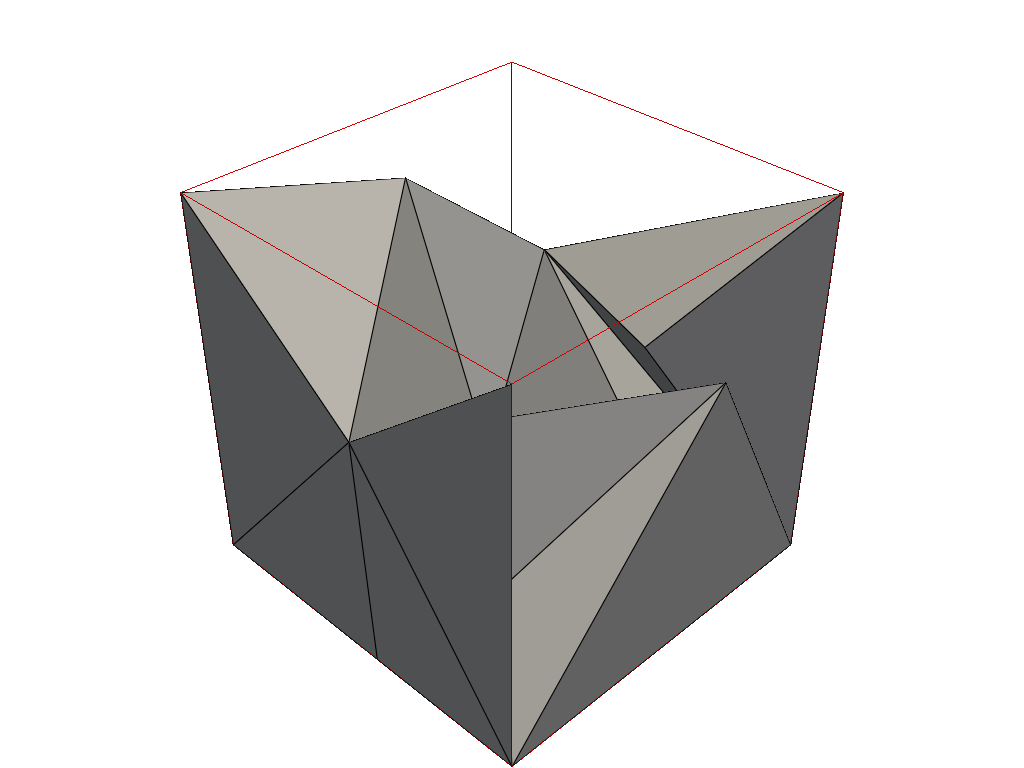

In [5]:
import numpy as np
import pyvista as pv

polyhedral_mesh = polyllaFace_mesh_prueba.polyhedral_mesh

list_of_cells = []

face_list = polyllaFace_mesh_prueba.mesh.face_list
node_list = polyllaFace_mesh_prueba.mesh.node_list

polyhedral_list = []
for poly in polyhedral_mesh:
    nFaces = len(poly.faces)
    nElements = nFaces*(3 + 1) + 1 # 3 vertices per face + 1 the number of vértices and + 1 for the number of faces
    vtk_polyhedral = [nElements, nFaces]
    for face in poly.faces:
        vtk_polyhedral.append(3)
        v1 = face_list[face].v1
        v2 = face_list[face].v2
        v3 = face_list[face].v3
        vtk_polyhedral.extend([v1, v2, v3])
    polyhedral_list.append(vtk_polyhedral)

elements = np.hstack(polyhedral_list)
nodes = np.hstack([[node_list[i].x, node_list[i].y, node_list[i].z] for i in range(len(node_list))])
cell_type = np.empty(len(polyhedral_mesh), dtype='uint8')
cell_type[:] = 42

grid = pv.UnstructuredGrid(elements, cell_type, nodes)

# Calculate centroids of each polyhedral cell
cell_center = []
for poly in polyhedral_mesh:
    unique_vertices = []
    for face in poly.faces:
        v1 = face_list[face].v1
        v2 = face_list[face].v2
        v3 = face_list[face].v3
        unique_vertices.extend([v1, v2, v3])
    #remove duplicates
    unique_vertices = list(set(unique_vertices))
    centroid = [0.0, 0.0, 0.0]
    for vertex in unique_vertices:
        centroid[0] += node_list[vertex].x
        centroid[1] += node_list[vertex].y
        centroid[2] += node_list[vertex].z
    centroid[0] /= len(unique_vertices)
    centroid[1] /= len(unique_vertices)
    centroid[2] /= len(unique_vertices)
    cell_center.append(centroid.copy())

cell_center = np.vstack(cell_center)
     
# extract cells below the 0 xy plane
mask = cell_center[:, 2] < 0.5
cell_ind = mask.nonzero()[0]
subgrid = grid.extract_cells(cell_ind)
# advanced plotting
plotter = pv.Plotter(notebook=True)
plotter.background_color = 'white'
plotter.add_mesh(subgrid, 'lightgrey', lighting=True, show_edges=True)
plotter.add_mesh(pv.Cube(center=(0.5, 0.5, 0.5)), 'r', 'wireframe')
#plotter.add_legend([[' Input Mesh ', 'r'], [' Tessellated Mesh ', 'black']])
plotter.show(jupyter_backend='static')
    


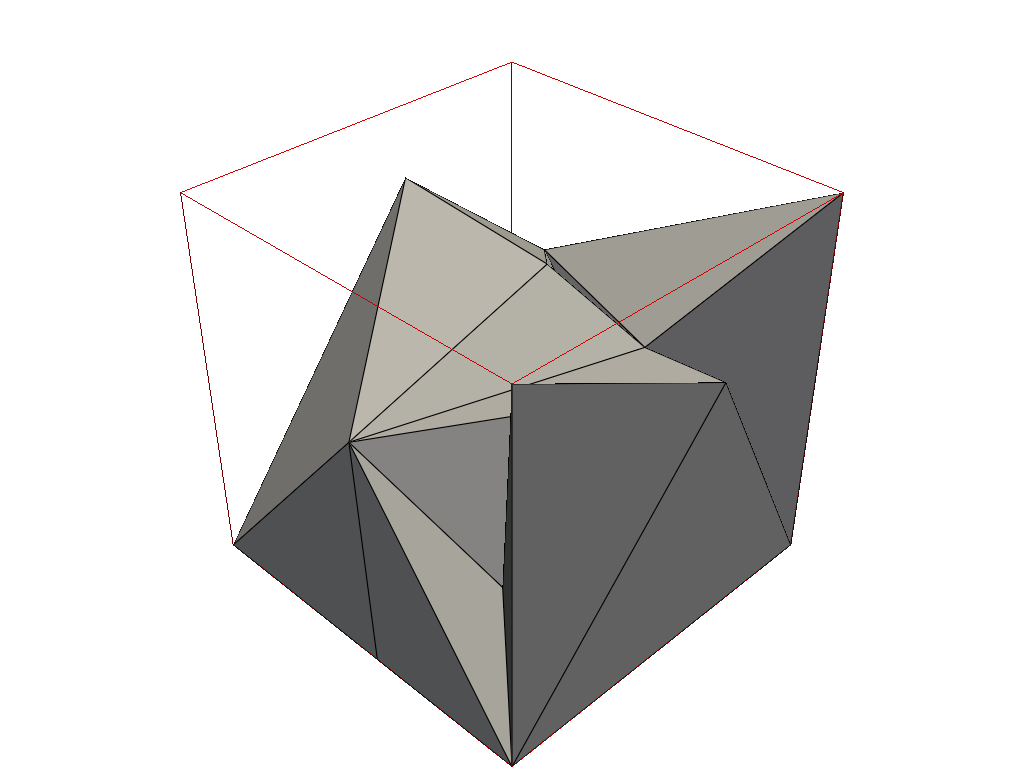

In [6]:
import numpy as np
import pyvista as pv

polyhedral_mesh = polyllaFace_mesh_prueba.polyhedral_mesh

list_of_cells = []

face_list = polyllaFace_mesh_prueba.mesh.face_list
node_list = polyllaFace_mesh_prueba.mesh.node_list

polyhedral_list = []
for poly in polyhedral_mesh:
    nFaces = len(poly.faces)
    nElements = nFaces*(3 + 1) + 1 # 3 vertices per face + 1 the number of vértices and + 1 for the number of faces
    vtk_polyhedral = [nElements, nFaces]
    for face in poly.faces:
        vtk_polyhedral.append(3)
        v1 = face_list[face].v1
        v2 = face_list[face].v2
        v3 = face_list[face].v3
        vtk_polyhedral.extend([v1, v2, v3])
    polyhedral_list.append(vtk_polyhedral)

elements = np.hstack(polyhedral_list)
nodes = np.hstack([[node_list[i].x, node_list[i].y, node_list[i].z] for i in range(len(node_list))])
cell_type = np.empty(len(polyhedral_mesh), dtype='uint8')
cell_type[:] = 42

grid = pv.UnstructuredGrid(elements, cell_type, nodes)

# Calculate centroids of each polyhedral cell
cell_center = []
for poly in polyhedral_mesh:
    unique_vertices = []
    for face in poly.faces:
        v1 = face_list[face].v1
        v2 = face_list[face].v2
        v3 = face_list[face].v3
        unique_vertices.extend([v1, v2, v3])
    #remove duplicates
    unique_vertices = list(set(unique_vertices))
    centroid = [0.0, 0.0, 0.0]
    for vertex in unique_vertices:
        centroid[0] += node_list[vertex].x
        centroid[1] += node_list[vertex].y
        centroid[2] += node_list[vertex].z
    centroid[0] /= len(unique_vertices)
    centroid[1] /= len(unique_vertices)
    centroid[2] /= len(unique_vertices)
    cell_center.append(centroid.copy())

cell_center = np.vstack(cell_center)
     
# extract cells below the 0 xy plane
mask = cell_center[:, 2] < 0.5
cell_ind = mask.nonzero()[0]
subgrid = grid.extract_cells(cell_ind)
# advanced plotting
plotter = pv.Plotter(notebook=True)
plotter.background_color = 'white'
plotter.add_mesh(subgrid, 'lightgrey', lighting=True, show_edges=True)
plotter.add_mesh(pv.Cube(center=(0.5, 0.5, 0.5)), 'r', 'wireframe')
#plotter.add_legend([[' Input Mesh ', 'r'], [' Tessellated Mesh ', 'black']])
plotter.show(jupyter_backend='static')
    


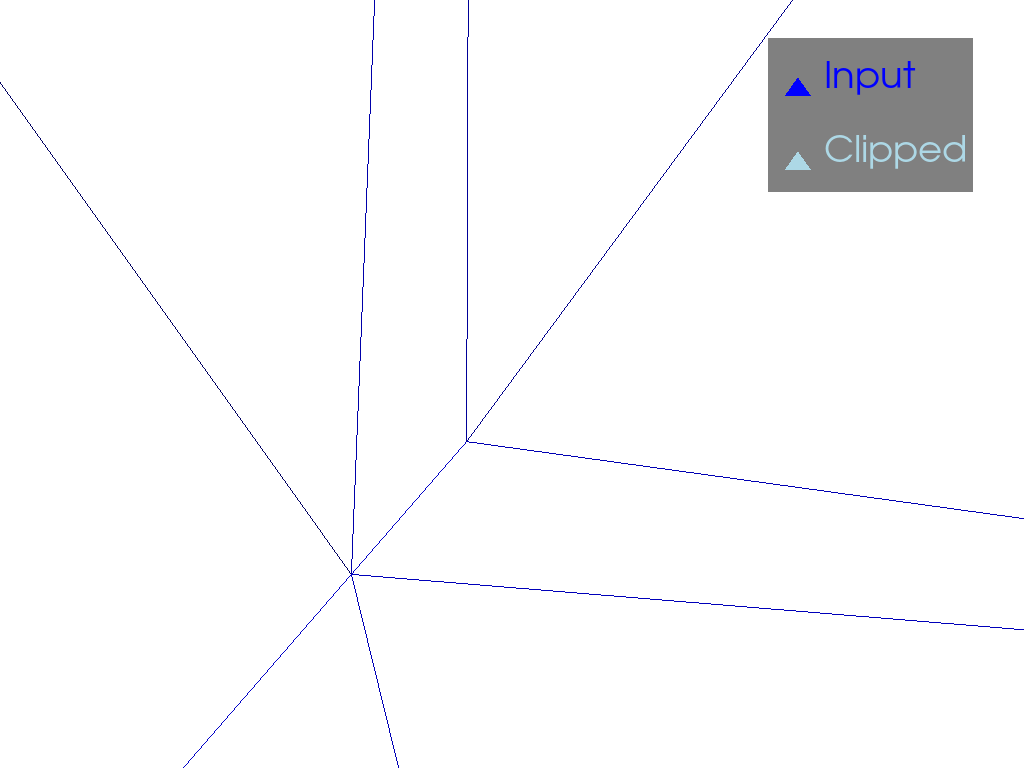

In [7]:
from pyvista import examples


clipped = grid.clip('y', invert=False)

p = pv.Plotter()
p.add_mesh(grid, style='wireframe', color='blue', label='Input')
p.add_mesh(clipped, label='Clipped')
p.add_legend()
p.camera_position = [(0.24, 0.32, 0.7), (0.02, 0.03, -0.02), (-0.12, 0.93, -0.34)]
p.show(jupyter_backend='static')